In [1]:
from aligned_dynamics import Aligned_Dynamics
import numpy as np 
import matplotlib.pyplot as plt 

from utils import get_random_regression_task
from scipy.linalg import qr
from linear_network import LinearNetwork
from utils import get_lambda_balanced

from aligned_dynamics2 import Aligned_Dynamics2

(array([[-0.03997605,  0.97872856, -0.67124291],
       [-0.8822412 ,  0.61690174,  0.20361409],
       [ 0.89186397,  0.71661635,  0.04119479]]), array([[ 0.39244095,  0.42327939, -1.07838299],
       [-1.31908446, -0.14158029, -0.80407819],
       [ 0.12207076,  1.22473909,  0.00510006]]), array([[2.27059241, 0.        , 0.        ],
       [0.        , 1.79691624, 0.        ],
       [0.        , 0.        , 0.51358975]]), array([[-4.98820273e-01, -1.11022302e-16, -8.88178420e-16],
       [-1.11022302e-16, -4.98820273e-01, -5.55111512e-17],
       [-8.88178420e-16, -5.55111512e-17, -4.98820273e-01]]))


In [2]:
in_dim = 3
hidden_dim = 3
out_dim = 3

batch_size = 3
learning_rate = 0.01
training_steps = 1000

X, Y = get_random_regression_task(batch_size, in_dim, out_dim)

X = X 
Y = Y
U, S, Vt = np.linalg.svd(1/batch_size*Y@X.T)

lmda = 0.01
init_w1_hat, init_w2_hat = get_lambda_balanced(lmda, in_dim, hidden_dim, out_dim)

U_, S_, Vt_ = np.linalg.svd(init_w2_hat @ init_w1_hat)

init_w2 = U @ U_.T @ init_w2_hat  * 2
init_w1 = init_w1_hat @ Vt_.T @ Vt  * 2

# lmda = 1
# a = (np.sqrt(lmda) + 1)
# b = np.sqrt(2*np.sqrt(lmda) + 1)

# init_w1_hat = np.eye(hidden_dim)*a
# init_w2_hat = np.eye(hidden_dim)*b

# H = np.random.randn(hidden_dim, hidden_dim)
# R, _ = qr(H)

# init_w1 = R @ init_w1_hat @ Vt 
# init_w2 = U @ init_w2_hat @ R.T 

model = LinearNetwork(in_dim, hidden_dim, out_dim, init_w1.copy(), init_w2.copy())
w1s, w2s, losses = model.train(X, Y, training_steps, learning_rate)
ws = np.array([w2 @ w1 for (w2, w1) in zip(w2s, w1s)])
ws = np.expand_dims(ws, axis=1)

as_list = [np.diag(U.T @ w2 @ w1 @ Vt.T) for (w2, w1) in zip(w2s, w1s)]


In [3]:
starting_svs = as_list[0]
# theta0 = theta0 = np.arcsinh(starting_svs * 2 / lmda)
aligned_dynamics = Aligned_Dynamics2(init_w1, init_w2, X, Y)

analytical_dynamics = [aligned_dynamics.forward(learning_rate) for _ in range(training_steps)]

AttributeError: 'Aligned_Dynamics2' object has no attribute 'lmda'

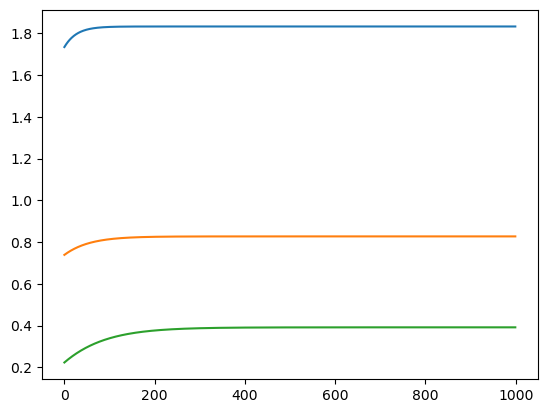

In [23]:
plt.plot(as_list)

Text(0, 0.5, 'Singular Values of Weights')

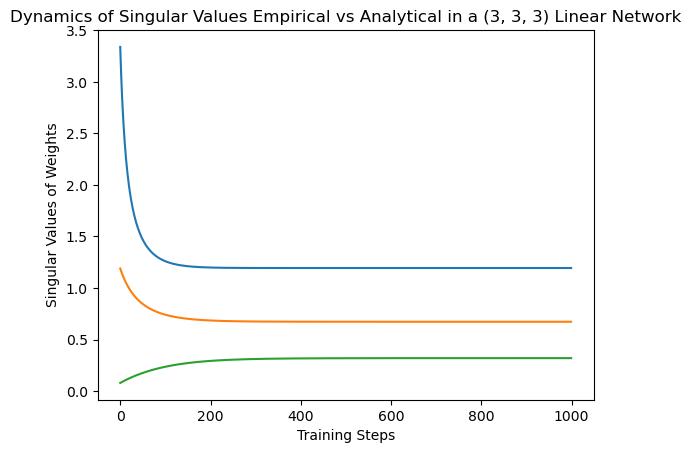

In [5]:

plt.title('Dynamics of Singular Values Empirical vs Analytical in a (3, 3, 3) Linear Network')
plt.plot(analytical_dynamics)
plt.xlabel('Training Steps')
plt.ylabel('Singular Values of Weights')

ValueError: 'light blue' is not a valid value for color

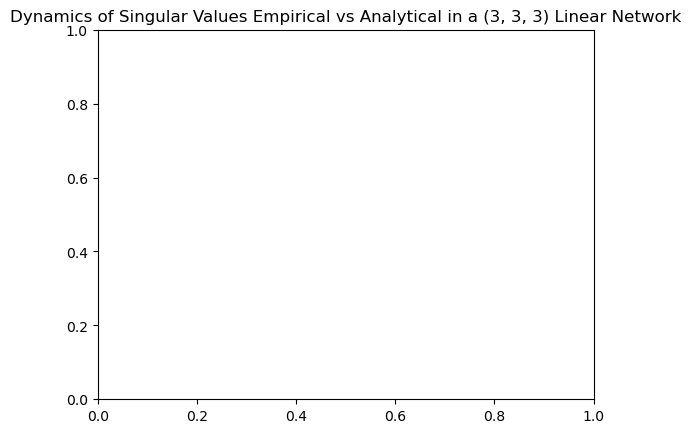

In [12]:
plt.title('Dynamics of Singular Values Empirical vs Analytical in a (3, 3, 3) Linear Network')
plt.plot(analytical_dynamics, label='Analytical Dynamics', color='light blue')
plt.plot(analytical_dynamics, linestyle='--', color='grey', label='Analytical Dynamics (Dashed)')
plt.xlabel('Training Steps')
plt.ylabel('Singular Values of Weights')
plt.legend()
plt.show()

ValueError: too many values to unpack (expected 2)

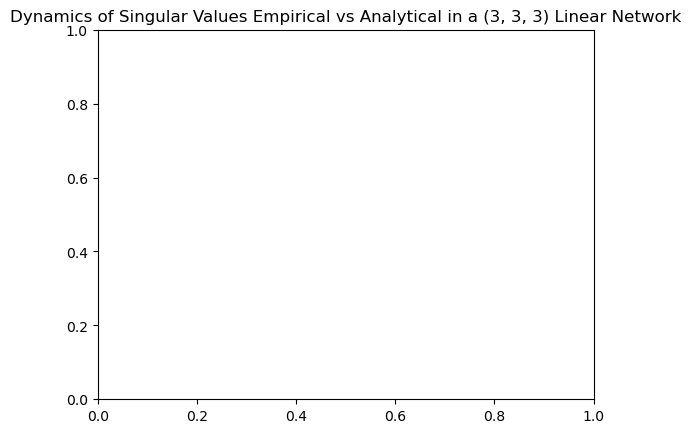

In [23]:
plt.title('Dynamics of Singular Values Empirical vs Analytical in a (3, 3, 3) Linear Network')

analytical_dynamics = np.asarray(analytical_dynamics).T

for i, data in analytical_dynamics:


    # Plot the solid line with light blue color
    plt.plot(analytical_dynamics, color='lightblue', label=f'Empirical Dynamics for singular value {i}')

    # Plot the dashed line with grey color
    plt.plot(analytical_dynamics, linestyle='--', color='grey', label=f'Analytical Dynamics for singular value {i}')

plt.xlabel('Training Steps')
plt.ylabel('Singular Values of Weights')

# Display the legend with only two labels
plt.legend()

plt.show()

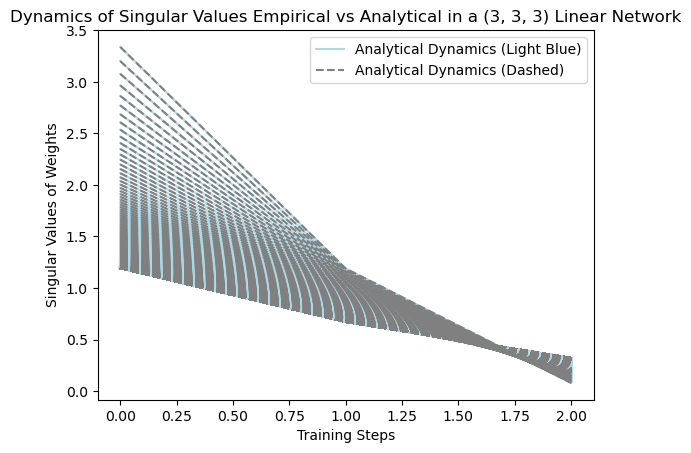

In [15]:
plt.title('Dynamics of Singular Values Empirical vs Analytical in a (3, 3, 3) Linear Network')

# Plot the solid light blue line
for data in analytical_dynamics:
    plt.plot(data, color='lightblue')

# Plot the dashed grey line
for data in analytical_dynamics:
    plt.plot(data, linestyle='--', color='grey')

plt.xlabel('Training Steps')
plt.ylabel('Singular Values of Weights')

# Manually add the legend
plt.plot([], [], color='lightblue', label='Analytical Dynamics (Light Blue)')
plt.plot([], [], linestyle='--', color='grey', label='Analytical Dynamics (Dashed)')

plt.legend()

plt.show()


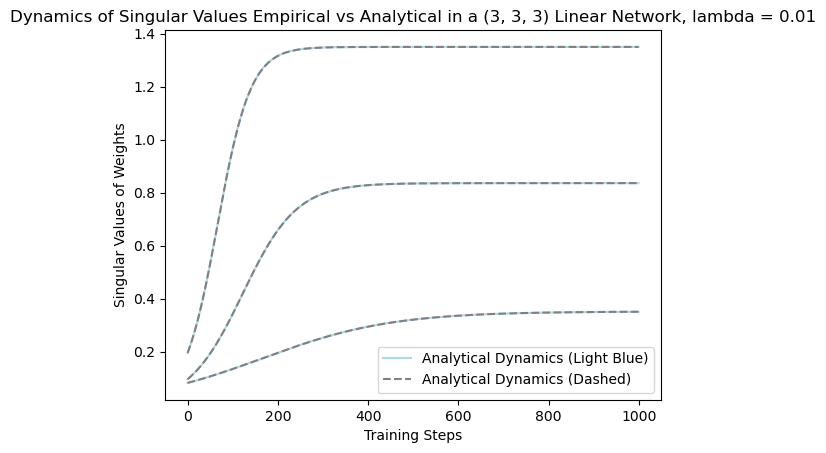

In [37]:
plt.title(f"Dynamics of Singular Values Empirical vs Analytical in a (3, 3, 3) Linear Network, lambda = {lmda}")

analytical_dynamics = np.asanyarray(as_list).T
# Plot the solid light blue line
for data in analytical_dynamics:
    plt.plot(data, color='lightblue')

# Plot the dashed grey line
for data in analytical_dynamics:
    plt.plot(data, linestyle='--', color='grey')

plt.xlabel('Training Steps')
plt.ylabel('Singular Values of Weights')

# Manually add the legend
plt.plot([], [], color='lightblue', label='Analytical Dynamics (Light Blue)')
plt.plot([], [], linestyle='--', color='grey', label='Analytical Dynamics (Dashed)')

plt.legend()

plt.show()
